# Machine Learning Foundations - A Case Study Approach
Week 1 - Demonstration

Donny van der Meer

## Load data
This notebook uses the *cleaned* house price dataset from Fabien Durand as presented on the website of Louis Dorard.

It can be found at the bottom of the page here: http://www.louisdorard.com/guest/everyone-can-do-data-science-pandas

The dataset contains data scraped from realtor.com for the Las Vegas, Nevada area

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from math import sqrt

%matplotlib inline
plt.style.use = 'default'

In [208]:
houses = pd.read_csv("realtor_importio_cleaned.csv").dropna()

In [209]:
houses.head()

,Unnamed: 0,address,bedrooms,full_bathrooms,half_bathrooms,type,size_sqft,lot_size,price
0,5967,6812 Mystic Plain Ct Las Vegas NV 89149,3.0,2.0,1.0,Single Family Home,1992.0,6098.0,220000
1,800,3416 Goldyke St Las Vegas NV 89115,3.0,2.0,0.0,Mfd/Mobile Home,1782.0,8276.0,60000
2,498,9222 Cowboy Rain Dr Las Vegas NV 89178,3.0,3.0,1.0,Single Family Home,1864.0,2178.0,173000
3,7627,845 Trotter Cir Las Vegas NV 89107,5.0,4.0,1.0,Single Family Home,4608.0,15246.0,600000
4,7772,10914 Iris Canyon Ln Las Vegas NV 89135,4.0,4.0,1.0,Single Family Home,3951.0,13503.6,799000


In [210]:
len(houses)

4058

In [212]:
houses.drop(houses.columns[0], axis = 1, inplace = True) # Just remove the column with IDs

In [213]:
houses.head()

,bedrooms,full_bathrooms,half_bathrooms,type,size_sqft,lot_size,price
0,3.0,2.0,1.0,Single Family Home,1992.0,6098.0,220000
1,3.0,2.0,0.0,Mfd/Mobile Home,1782.0,8276.0,60000
2,3.0,3.0,1.0,Single Family Home,1864.0,2178.0,173000
3,5.0,4.0,1.0,Single Family Home,4608.0,15246.0,600000
4,4.0,4.0,1.0,Single Family Home,3951.0,13503.6,799000


## Exploring the data for housing sales

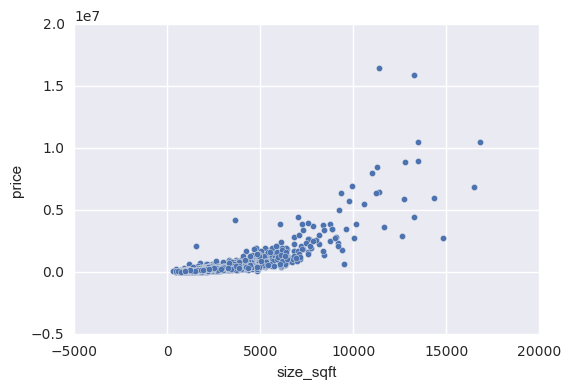

In [214]:
houses.plot.scatter(x = 'size_sqft', y = 'price')

## Create simple regression model of size_sqft to price

In [215]:
train_data, test_data = train_test_split(houses, test_size = 0.2, random_state = 42)

In [216]:
print(len(train_data), len(test_data))

3246 812


## Build the regression model

In [217]:
sqft_model = linear_model.LinearRegression()
train_X = np.reshape(train_data['size_sqft'], (-1, 1))
train_Y = train_data['price']
sqft_model.fit(X = train_X, y = train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the simple model

### Define a helper function to assess model performance

In [218]:
def evaluate(model, test_X, test_y):
    errors = model.predict(test_X) - test_y
    return {'rmse': sqrt(np.mean(errors ** 2)), 'max_error' : errors.max()}

### Evaluate the model using the test data

In [219]:
test_X = np.reshape(test_data['size_sqft'], (-1, 1))
test_Y = test_data['price']
test_data['price'].mean()

314504.38669950736

In [220]:
evaluate(sqft_model, test_X, test_Y)

{'max_error': 2263432.3719121497, 'rmse': 323482.1202859185}

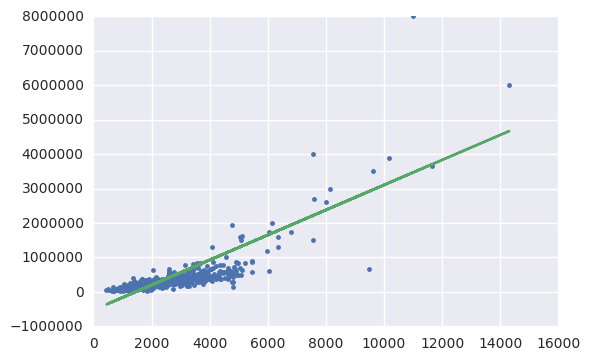

In [221]:
plt.plot(test_data['size_sqft'], test_data['price'], '.',
        test_data['size_sqft'], sqft_model.predict(test_X), '-')

In [222]:
sqft_model.coef_

array([ 363.1397523])

In [223]:
sqft_model.intercept_

-527679.92092623631

## Explore other features in the data

In [224]:
houses.columns

Index(['bedrooms', 'full_bathrooms', 'half_bathrooms', 'type', 'size_sqft',
       'lot_size', 'price'],
      dtype='object')

In [225]:
my_features = ['bedrooms', 'full_bathrooms', 'half_bathrooms', 'type', 'size_sqft', 'lot_size']

In [226]:
houses[my_features].describe(include = 'all')

,bedrooms,full_bathrooms,half_bathrooms,type,size_sqft,lot_size
count,4058.000000,4058.000000,4058.000000,4058,4058.000000,4.058000e+03
unique,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,Single Family Home,NaN,NaN
freq,NaN,NaN,NaN,3317,NaN,NaN
mean,3.614096,2.506407,0.468457,NaN,2387.729177,2.168934e+04
std,1.123579,0.923808,0.556509,NaN,1462.517415,2.591895e+05
min,1.000000,1.000000,0.000000,NaN,325.000000,4.350000e+02
25%,3.000000,2.000000,0.000000,NaN,1486.000000,3.920000e+03
50%,4.000000,2.000000,0.000000,NaN,1979.000000,6.098000e+03
75%,4.000000,3.000000,1.000000,NaN,2896.000000,8.712000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bdb3198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x192f7b668>]], dtype=object)

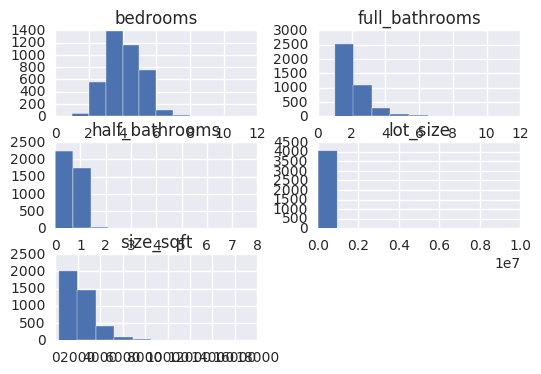

In [227]:
houses[my_features].hist()

Pandas only shows numerical columns by default, so the house type needs to be plotted separately

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1928bd668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x191a29f60>]], dtype=object)

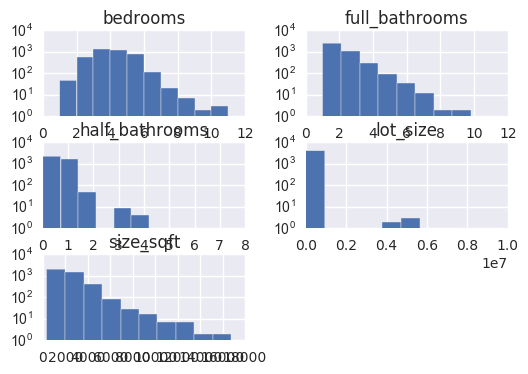

In [228]:
houses[my_features].hist(log = True)

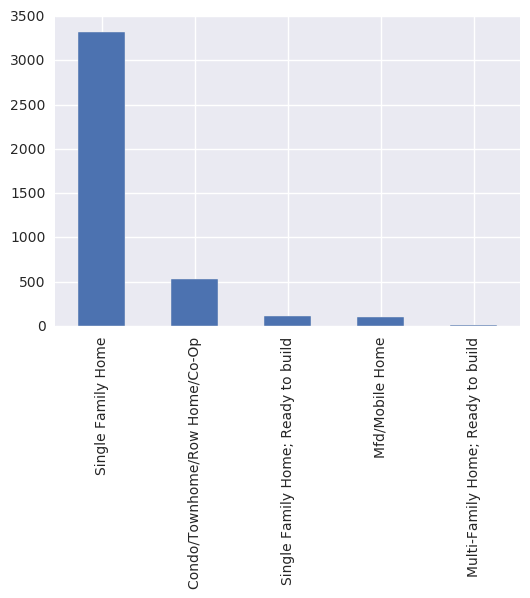

In [229]:
houses['type'].value_counts().plot(kind='bar')

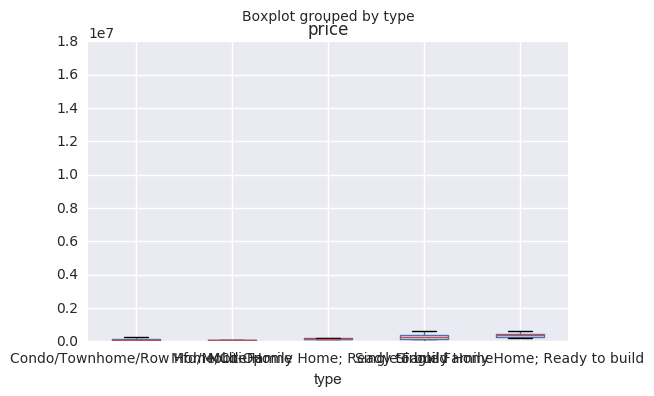

In [230]:
houses.boxplot(column = 'price', by = 'type')

In [231]:
houses['logprice'] = np.log(houses['price'])

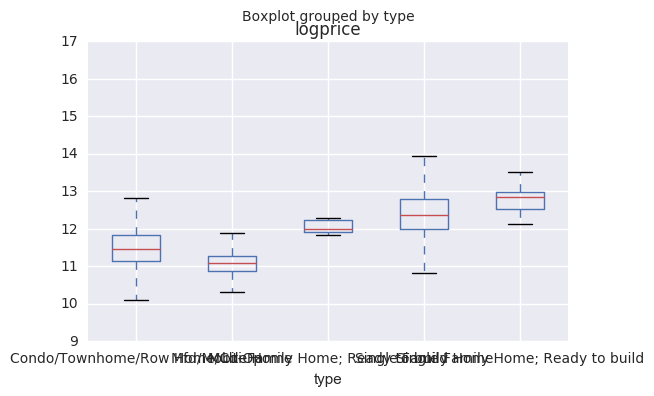

In [232]:
houses.boxplot(column = 'logprice', by = 'type')

## Build a regression model with more features

In [233]:
train_with_dummies = pd.get_dummies(train_data[my_features])
test_with_dummies = pd.get_dummies(test_data[my_features])
train_with_dummies.head()

,bedrooms,full_bathrooms,half_bathrooms,size_sqft,lot_size,type_Condo/Townhome/Row Home/Co-Op,type_Mfd/Mobile Home,type_Multi-Family Home; Ready to build,type_Single Family Home,type_Single Family Home; Ready to build
2685,2.0,1.0,1.0,1210.0,1306.0,1.0,0.0,0.0,0.0,0.0
4201,5.0,3.0,0.0,2259.0,6098.0,0.0,0.0,0.0,1.0,0.0
519,5.0,5.0,1.0,6810.0,14810.4,0.0,0.0,0.0,1.0,0.0
4100,5.0,4.0,1.0,4019.0,130680.0,0.0,0.0,0.0,0.0,1.0
4297,3.0,2.0,1.0,1465.0,87120.0,0.0,0.0,0.0,0.0,1.0


In [235]:
my_features_model = linear_model.LinearRegression()
my_features_model.fit(X = train_with_dummies, y = train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [236]:
evaluate(my_features_model, test_with_dummies, test_Y)

{'max_error': 2685464.2433413896, 'rmse': 306374.2678860222}

In [237]:
evaluate(sqft_model, test_X, test_Y)

{'max_error': 2263432.3719121497, 'rmse': 323482.1202859185}